# <center> Fortune 500 companies revenue and profit analysis   </center>

In this notebook, we will analyze the Fortune 500 dataset, focusing on the revenues and profits of the largest companies over a 50-year period. The notebook is structured around three main tasks:

1. Data Overview: We will begin with loading the dataset and libraries together with examining basic information about the dataset.
2. Data Preprocessing: 
We will conduct data preprocessing tasks, such as checking for missing values, data types, and data type transformation where necessary.
3. Profits and Revenues Analysis: We will calculate the mean and sum of profits and revenues, accompanied by informative plots for visualization.



## 1. Import libraries and load data

We begin by importing libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We load the dataset from a local directory.

In [3]:
df=pd.read_csv("fortune500 1955-2005.csv")

In [4]:
df

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


We check basic information about the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


In [6]:
df.describe()

,Year,Rank,Revenue (in millions)
count,25500.00000,25500.000000,25500.000000
mean,1980.00000,250.499765,4273.329635
std,14.71989,144.339963,11351.884979
min,1955.00000,1.000000,49.700000
25%,1967.00000,125.750000,362.300000
50%,1980.00000,250.500000,1019.000000
75%,1993.00000,375.250000,3871.000000
max,2005.00000,500.000000,288189.000000


## 2. Data preprocessing

### 2.1. Rename columns

We start with renaming the columns.

In [7]:
df.columns=['Year', 'Rank', 'Company', 'Revenue',
       'Profit']
df

,Year,Rank,Company,Revenue,Profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


### 2.3. Missing values

In our analysis, we will be mostly interested in profits and revenues. Let us check if these two columns do not contain missing values and if they are of float character.

<Axes: >

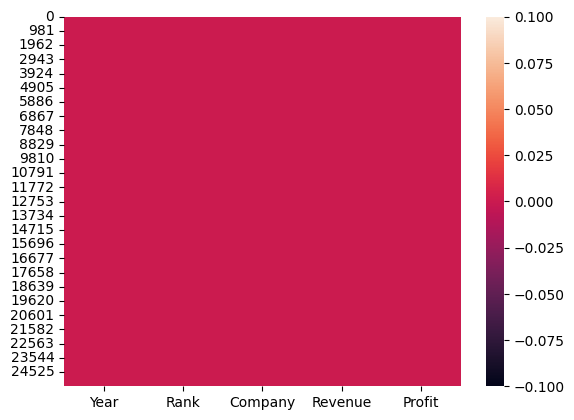

In [8]:
sns.heatmap(df.isnull())

As we can see, the dataset does not contain any missing values, which makes the analysis much easier.

### 2.3. Data types

Let us check types of the values in each column

In [9]:
df.dtypes

Year         int64
Rank         int64
Company     object
Revenue    float64
Profit      object
dtype: object

The profit column contains values of mixed types. Let us check it further.

In [10]:
#df.Profit.iloc[[228]]

In [12]:
pd.to_numeric(df['Profit'])

ValueError: Unable to parse string "N.A." at position 228

We obtained error due to "N.A." value in the Profit column.

In [13]:
df[df.Profit=='N.A.']

,Year,Rank,Company,Revenue,Profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.
...,...,...,...,...,...
24242,2003,243,Farmland Industries,7580.2,N.A.
24296,2003,297,Land O'Lakes,5847.0,N.A.
24435,2003,436,Roundy's,3637.9,N.A.
24489,2003,490,Ace Hardware,3029.0,N.A.


Let us see how big portion of the dataframe are rows with 'N.A.' values.

In [14]:
def func(x):
    if x=='N.A.':
        return 1
    else:
        return 0

<Axes: >

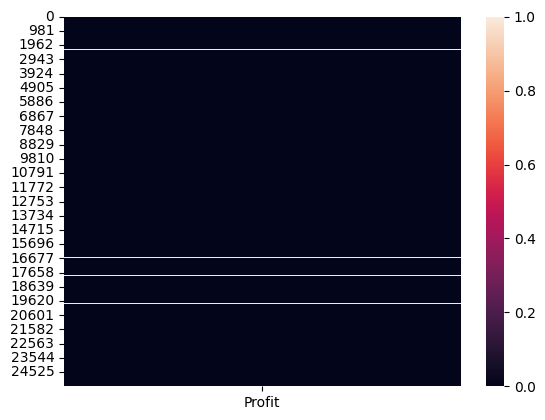

In [15]:
sns.heatmap(pd.DataFrame(df['Profit'].apply(func))  )

In [16]:
print(len(df[df.Profit=='N.A.']))
print(len(df['Profit']))

369
25500


In [17]:
print(len(df[df.Profit=='N.A.'])/len(df['Profit']))

0.014470588235294117


Since the missing values are less than 1.5% of all the values we can just remove them. The rest of the values in the 'Profit' column we will transform into float type. 

In [19]:
df=df[df['Profit']!='N.A.']  # select only rows without NA
df['Profit']=df['Profit'].apply(lambda x: float(x))

C:\Users\Marcin\AppData\Local\Temp\ipykernel_27320\3561529564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit']=df['Profit'].apply(lambda x: float(x))


In [20]:
df.dtypes

Year         int64
Rank         int64
Company     object
Revenue    float64
Profit     float64
dtype: object

From the above we can see that now we have float values in both Profit anf Revenue columns.

In [ ]:
df

,Year,Rank,Company,Revenue,Profit
0,1955,1,General Motors,9823.5,806.0
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493.0
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


## 3. Total and mean revenues each year

Now, once the dataset is prepared, we move on to the data analysis of the DataFrame. We will analyze both the revenues and profits of the companies from Fortune 500.

Let's start by analyzing the mean revenue and profit of the companies by year.

In [ ]:
grouped=df[['Year','Revenue','Profit']].groupby(['Year']).mean()
grouped

,Revenue,Profit
Year,,
1955,275.754453,16.732186
1956,323.604418,22.509237
1957,350.037626,23.181087
1958,377.977264,23.456740
1959,355.229376,19.279276
1960,395.231864,24.019439
1961,410.552410,23.340361
1962,419.556827,23.326104
1963,458.164200,26.965000


# To be continued...